In [160]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

labels = [
    0.2,
    0.3,
    0.4,
    0.5,
    0.6,
    0.7,
    0.8,
    0.8,
    0.9,
    1,]
    # 1.1,
    # 1.2,
    # 1.3,
    # 1.4,
    # 1.5,
    # 1.6,
    # 1.7,
    # 1.8,
    # 1.9,
    # 2,
#     2.1,
#     2.2,
#     2.3,
#     2.4,
#     2.5,
#     2.6,
#     2.7,
#     2.8,
#     2.9,
#     3,
#     4,
#     5,
#     6,
#     7,
#     8,
#     9,
#     10
# ]
df = []
masses = []
for label in labels:
    masses += [label]
    df += [pd.read_csv(f"{label}.data", sep="\s+")]
masses = np.array(masses)

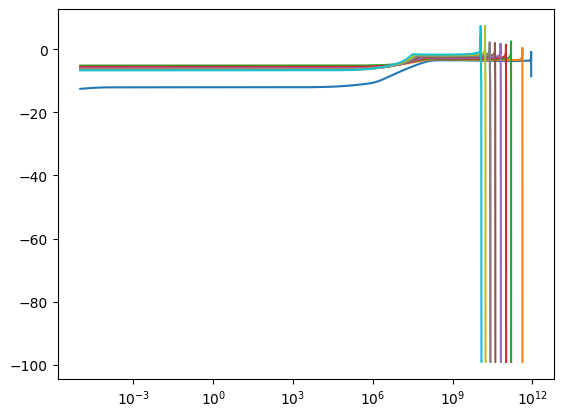

In [161]:
plt.xscale("log")
for d in df:
    plt.plot(d["star_age"], d["log_Lneu"])

In [162]:
ages = []
lums = []
for d in df:
    condition = 10 * d["log_LH"] > 1 * 10 * d["log_L"]
    if condition.any():
        start_h_burning = d.loc[condition, "star_age"].iloc[0]
    else:
        start_h_burning = None

    condition = d["center_h1"] < 1e-6
    if condition.any():
        end_h_burning = d.loc[condition, "star_age"].iloc[0]
    else:
        end_h_burning = None

    d = d[(d["star_age"] > start_h_burning) & (d["star_age"] < end_h_burning)]

    ages += [d["star_age"]]
    lums += [d["log_Lneu"]]

min_length = min(len(lum) for lum in lums)
ages = np.log([age[:min_length] for age in ages])
lums = np.array([lum[:min_length] for lum in lums])

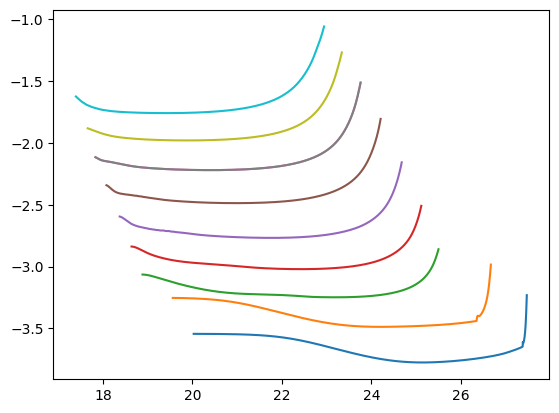

In [163]:
for a, l, label in zip(ages, lums, labels):
    plt.plot(a, l, label=label)
# plt.xscale("log")

In [164]:
print(masses.shape)
print(ages.shape)
print(lums.shape)

(10,)
(10, 1157)
(10, 1157)


In [165]:
from sklearn.linear_model import LinearRegression as LnR

output = np.array(
    [
        *(i for z in zip(ages.T, lums.T) for i in z),
    ]
).T
print(output.shape)
model = LnR()
model.fit(np.array([masses]).T, output)

(10, 2314)


LinearRegression()

(1, 2314)


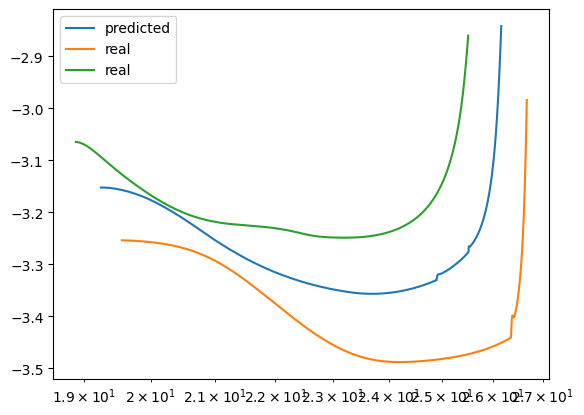

In [166]:
# n = -2
# prediction = model.predict([[masses[n]]])
prediction = model.predict([[0.36]])
predicted_ages = prediction[:, ::2]
predicted_lums = prediction[:, 1::2]
print(prediction.shape)

plt.plot(predicted_ages[0], predicted_lums[0], label="predicted")
# plt.plot(ages[n], lums[n], label="real")
plt.plot(ages[1], lums[1], label="real")
plt.plot(ages[2], lums[2], label="real")
plt.xscale("log")
plt.legend()
